In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("finalTrain.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [5]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [6]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [113]:
df[df['Weather_conditions']=="Fog"]['Road_traffic_density'].value_counts()

Low       2597
Jam       2428
Medium    1852
High       776
Name: Road_traffic_density, dtype: int64

<AxesSubplot:xlabel='Road_traffic_density', ylabel='Count'>

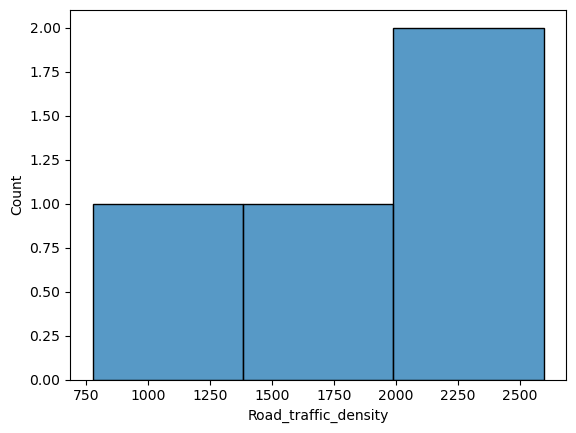

In [114]:
sns.histplot(df[df['Weather_conditions']=="Fog"]['Road_traffic_density'].value_counts())

<AxesSubplot:xlabel='Road_traffic_density', ylabel='Count'>

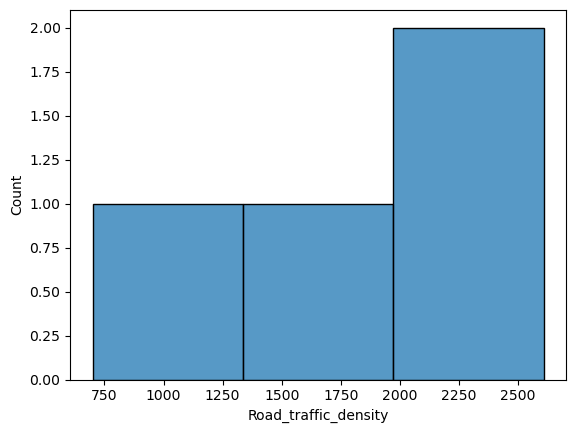

In [116]:
sns.histplot(df[df['Weather_conditions']=="Sandstorms"]['Road_traffic_density'].value_counts())

In [24]:
import seaborn as sns

In [57]:
null_cols = df.isnull().any(axis=0)
null_cols_list = null_cols[null_cols].index.tolist()
null_df = df[null_cols_list]
null_df

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,multiple_deliveries,Festival,City
0,36.0,4.2,21:55,Fog,Jam,3.0,No,Metropolitian
1,21.0,4.7,14:55,Stormy,High,1.0,No,Metropolitian
2,23.0,4.7,17:30,Sandstorms,Medium,1.0,No,Metropolitian
3,34.0,4.3,09:20,Sandstorms,Low,0.0,No,Metropolitian
4,24.0,4.7,19:50,Fog,Jam,1.0,No,Metropolitian
...,...,...,...,...,...,...,...,...
45579,30.0,4.8,11:35,Windy,High,0.0,No,Metropolitian
45580,21.0,4.6,19:55,Windy,Jam,1.0,No,Metropolitian
45581,30.0,4.9,23:50,Cloudy,Low,0.0,No,Metropolitian
45582,20.0,4.7,13:35,Cloudy,High,1.0,No,Metropolitian


# There are 8 features in the dataset that have nan values

In [26]:
null_df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd',
       'Weather_conditions', 'Road_traffic_density', 'multiple_deliveries',
       'Festival', 'City'],
      dtype='object')

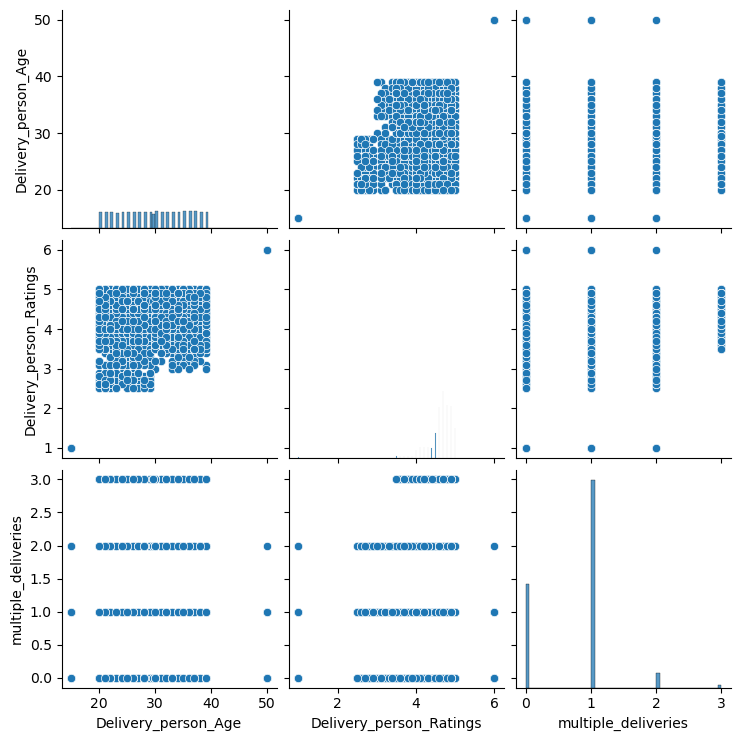

In [79]:
sns.pairplot(null_df)

In [27]:
null_df.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Time_Orderd                 object
Weather_conditions          object
Road_traffic_density        object
multiple_deliveries        float64
Festival                    object
City                        object
dtype: object

In [28]:
#Lets handle the null values of Delivery_person_Age
null_df['Delivery_person_Age'].isnull().sum()

1854

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Count'>

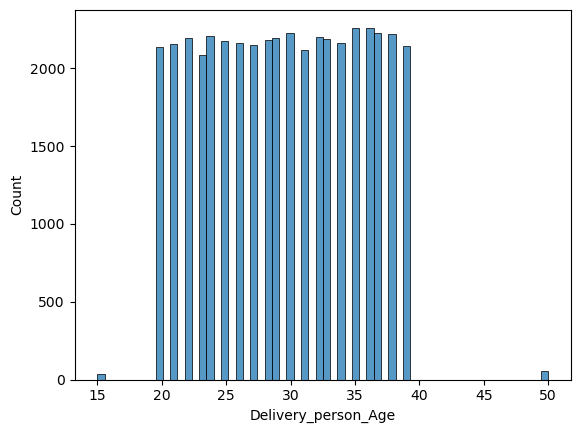

In [29]:
sns.histplot(null_df['Delivery_person_Age'])

<AxesSubplot:xlabel='Delivery_person_Age'>

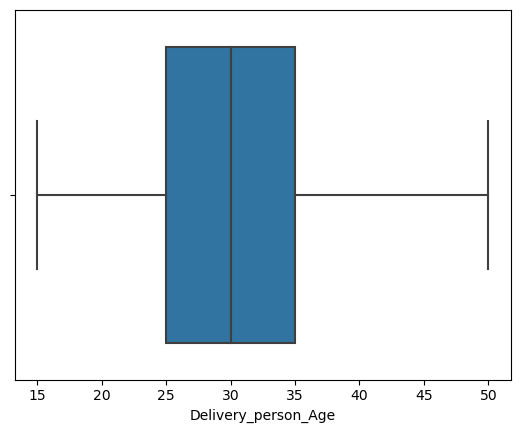

In [30]:
sns.boxplot(null_df['Delivery_person_Age'])

# Since there is no outliers in Age feature we can replcae with mean of the age

In [58]:
import warnings
warnings.filterwarnings("ignore")
null_df['Delivery_person_Age']=null_df['Delivery_person_Age'].fillna(np.mean(null_df['Delivery_person_Age']))

In [59]:
#null values handled of age column
null_df['Delivery_person_Age'].isnull().sum()

0

In [33]:
null_df.isnull().sum()

Delivery_person_Age           0
Delivery_person_Ratings    1908
Time_Orderd                1731
Weather_conditions          616
Road_traffic_density        601
multiple_deliveries         993
Festival                    228
City                       1200
dtype: int64

# 2.Now we handle the null values of Delivery_person_Ratings    

In [44]:
null_df['Delivery_person_Ratings'].isnull().sum()

0

In [35]:
null_df['Delivery_person_Ratings'].value_counts()

4.8    7146
4.7    7140
4.9    7040
4.6    6938
5.0    3996
4.5    3302
4.1    1430
4.2    1418
4.3    1409
4.4    1360
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: Delivery_person_Ratings, dtype: int64

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Count'>

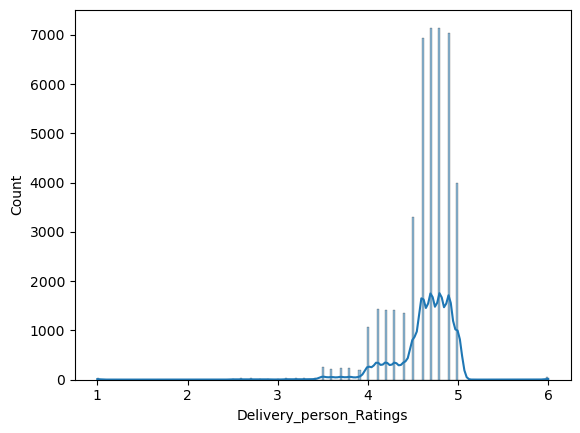

In [36]:
sns.histplot(null_df['Delivery_person_Ratings'],kde=True)

<AxesSubplot:xlabel='Delivery_person_Ratings'>

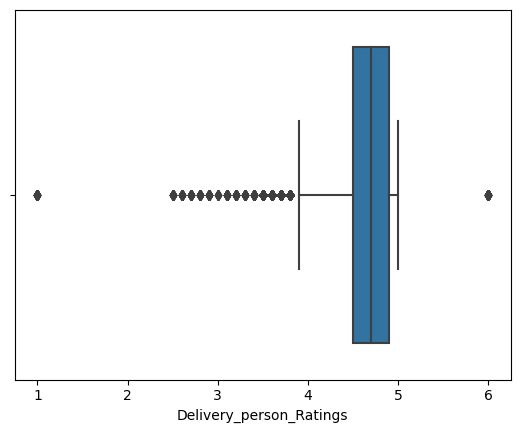

In [37]:
sns.boxplot(null_df['Delivery_person_Ratings'])

In [47]:
null_df['Delivery_person_Ratings'].median()

4.7

In [60]:
#To many ouyliers we can replace ratings with median of Ratings
null_df['Delivery_person_Ratings']=null_df['Delivery_person_Ratings'].fillna(null_df['Delivery_person_Ratings'].median())
null_df['Delivery_person_Ratings'].value_counts()

4.7    9048
4.8    7146
4.9    7040
4.6    6938
5.0    3996
4.5    3302
4.1    1430
4.2    1418
4.3    1409
4.4    1360
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: Delivery_person_Ratings, dtype: int64

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Count'>

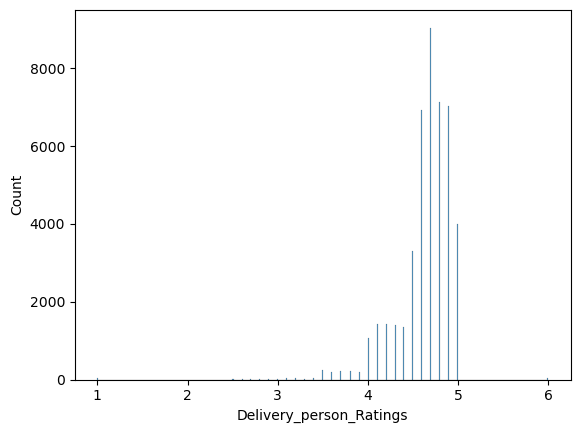

In [61]:
sns.histplot(null_df['Delivery_person_Ratings'])

In [62]:
null_df['Delivery_person_Ratings'].isnull().sum()

0

In [51]:
null_df.isnull().sum()

Delivery_person_Age        1854
Delivery_person_Ratings       0
Time_Orderd                1731
Weather_conditions          616
Road_traffic_density        601
multiple_deliveries         993
Festival                    228
City                       1200
dtype: int64

# 3.Now handle the null values of Time_Ordered(Object dataType)


In [52]:
null_df.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Time_Orderd                 object
Weather_conditions          object
Road_traffic_density        object
multiple_deliveries        float64
Festival                    object
City                        object
dtype: object

In [53]:
null_df['Time_Orderd'].head()

0    21:55
1    14:55
2    17:30
3    09:20
4    19:50
Name: Time_Orderd, dtype: object

In [63]:
null_df['Time_Ordered_hr']=null_df['Time_Orderd'].str.split(":").str[0]
null_df['Time_Ordered_min']=null_df['Time_Orderd'].str.split(":").str[1]

In [64]:
null_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,multiple_deliveries,Festival,City,Time_Ordered_hr,Time_Ordered_min
0,36.0,4.2,21:55,Fog,Jam,3.0,No,Metropolitian,21,55
1,21.0,4.7,14:55,Stormy,High,1.0,No,Metropolitian,14,55
2,23.0,4.7,17:30,Sandstorms,Medium,1.0,No,Metropolitian,17,30
3,34.0,4.3,09:20,Sandstorms,Low,0.0,No,Metropolitian,09,20
4,24.0,4.7,19:50,Fog,Jam,1.0,No,Metropolitian,19,50


In [72]:
null_df.drop(['Time_Orderd'],axis=1,inplace=True)

In [74]:
null_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,multiple_deliveries,Festival,City,Time_Ordered_hr,Time_Ordered_min
0,36.0,4.2,Fog,Jam,3.0,No,Metropolitian,21,55
1,21.0,4.7,Stormy,High,1.0,No,Metropolitian,14,55
2,23.0,4.7,Sandstorms,Medium,1.0,No,Metropolitian,17,30
3,34.0,4.3,Sandstorms,Low,0.0,No,Metropolitian,09,20
4,24.0,4.7,Fog,Jam,1.0,No,Metropolitian,19,50


In [75]:
null_df.isnull().sum()

Delivery_person_Age           0
Delivery_person_Ratings       0
Weather_conditions          616
Road_traffic_density        601
multiple_deliveries         993
Festival                    228
City                       1200
Time_Ordered_hr            1731
Time_Ordered_min           5799
dtype: int64

# null_df.head()


# 4.Handle the nan values of Weather_conditions          

In [76]:
null_df['Weather_conditions'].value_counts()

Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: Weather_conditions, dtype: int64

<AxesSubplot:xlabel='Weather_conditions', ylabel='Count'>

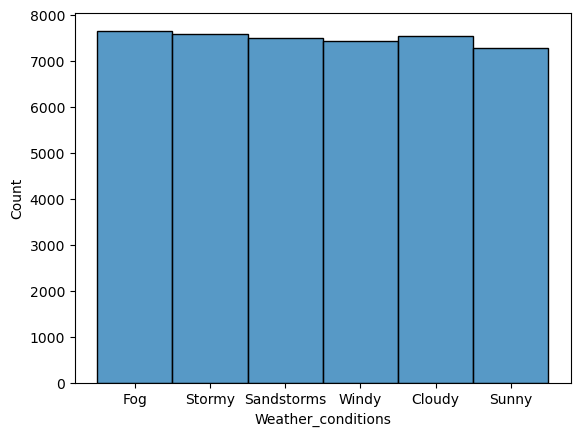

In [77]:
sns.histplot(null_df['Weather_conditions'])

# In Weather_conditions either we can drop nan values or can replace ith any one of the weather condition

# 5.handle the nan values of Road_traffic_density        

In [82]:
null_df['Road_traffic_density'].value_counts()

Low       15476
Jam       14139
Medium    10945
High       4423
Name: Road_traffic_density, dtype: int64

<AxesSubplot:xlabel='Road_traffic_density', ylabel='Count'>

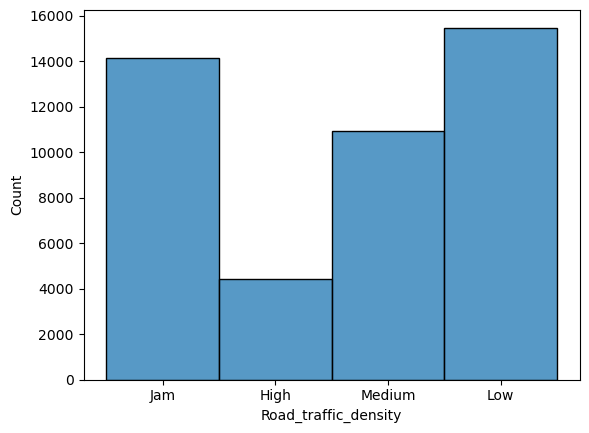

In [83]:
sns.histplot(df['Road_traffic_density'])

In [91]:
#Replace nan values with low
null_df['Road_traffic_density']=null_df['Road_traffic_density'].fillna("Low")

<AxesSubplot:xlabel='Road_traffic_density', ylabel='Count'>

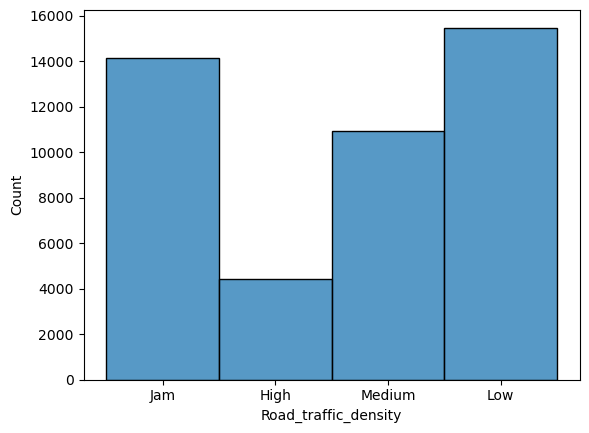

In [92]:
sns.histplot(df['Road_traffic_density'])

In [93]:
null_df.isnull().sum()

Delivery_person_Age           0
Delivery_person_Ratings       0
Weather_conditions          616
Road_traffic_density          0
multiple_deliveries         993
Festival                    228
City                       1200
Time_Ordered_hr            1731
Time_Ordered_min           5799
dtype: int64

# 6.Handle the nan values of Festival

In [95]:
null_df['Festival'].isnull().sum()

228

In [96]:
null_df['Festival'].value_counts()

No     44460
Yes      896
Name: Festival, dtype: int64

<AxesSubplot:xlabel='Festival', ylabel='Count'>

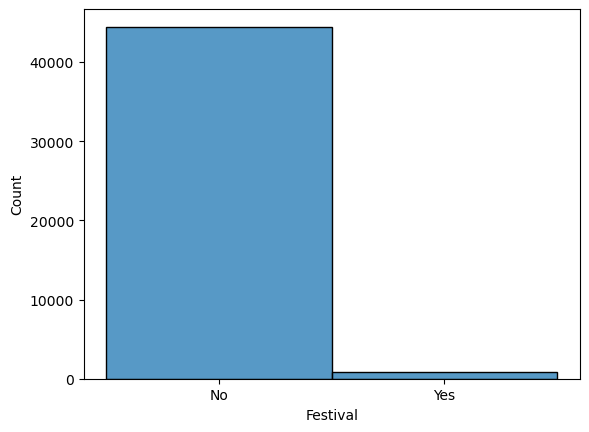

In [97]:
sns.histplot(null_df['Festival'])

In [98]:
#Replace the nan values with No
null_df['Festival']=null_df['Festival'].fillna("No")

<AxesSubplot:xlabel='Festival', ylabel='Count'>

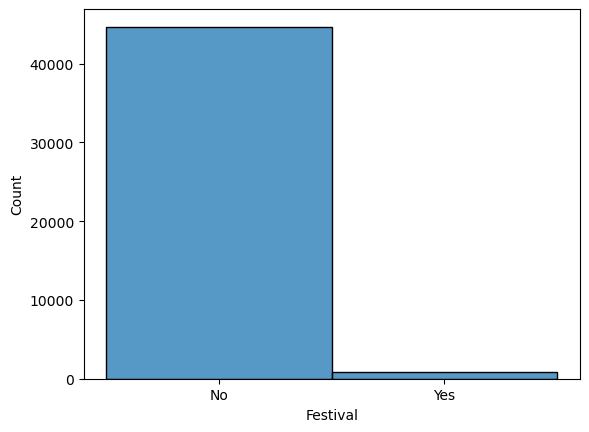

In [101]:
sns.histplot(null_df['Festival'])

In [100]:
null_df.isnull().sum()


Delivery_person_Age           0
Delivery_person_Ratings       0
Weather_conditions          616
Road_traffic_density          0
multiple_deliveries         993
Festival                      0
City                       1200
Time_Ordered_hr            1731
Time_Ordered_min           5799
dtype: int64

# 7.Handle the nan values of multiple_deliveries

In [102]:
null_df['multiple_deliveries'].value_counts()

1.0    28151
0.0    14094
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

<AxesSubplot:xlabel='multiple_deliveries', ylabel='Count'>

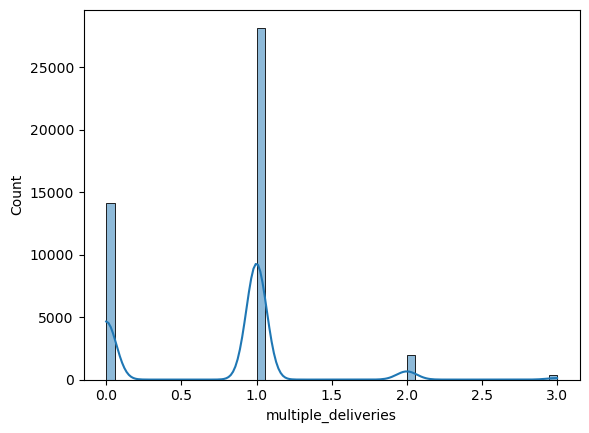

In [103]:
sns.histplot(null_df['multiple_deliveries'],kde=True)

In [105]:
null_df.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Weather_conditions          object
Road_traffic_density        object
multiple_deliveries        float64
Festival                    object
City                        object
Time_Ordered_hr             object
Time_Ordered_min            object
dtype: object

In [106]:
#Replacing nan values with 1.0
null_df['multiple_deliveries']=null_df['multiple_deliveries'].fillna(1.0)

<AxesSubplot:xlabel='multiple_deliveries', ylabel='Count'>

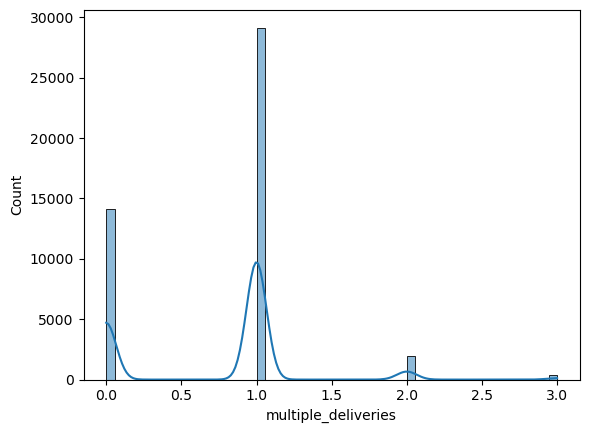

In [107]:
sns.histplot(null_df['multiple_deliveries'],kde=True)

# 7.Handle the nan values of city

In [108]:
null_df['City'].value_counts()

Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Count'>

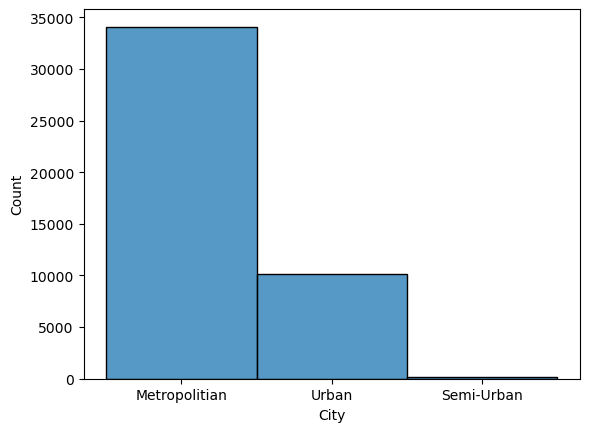

In [109]:
sns.histplot(null_df['City'])

In [110]:
#Replace the nan values with Metropolitian
null_df['City']=null_df['City'].fillna("Metropolitian")

<AxesSubplot:xlabel='City', ylabel='Count'>

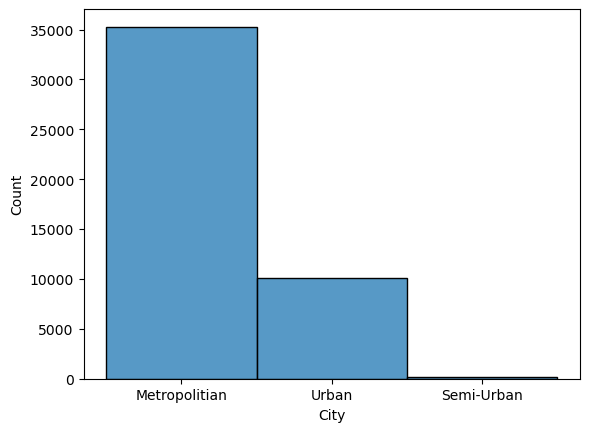

In [111]:
sns.histplot(null_df['City'])

In [112]:
null_df.isnull().sum()


Delivery_person_Age           0
Delivery_person_Ratings       0
Weather_conditions          616
Road_traffic_density          0
multiple_deliveries           0
Festival                      0
City                          0
Time_Ordered_hr            1731
Time_Ordered_min           5799
dtype: int64